In [101]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [102]:
# Fetch daily data for the index from Yahoo Finance
input = '^KLSE'
#Index = yf.Ticker(input).history (start='1990-01-01', end='2022-12-31',interval='1mo')
Index = yf.Ticker(input).history (period = 'max', interval='1mo')
Index

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1994-01-01 00:00:00+08:00,1278.609985,1332.040039,967.919983,1106.989990,0,0.0,0.0
1994-02-01 00:00:00+08:00,1114.319946,1158.130005,1065.010010,1125.630005,0,0.0,0.0
1994-03-01 00:00:00+08:00,1124.959961,1125.630005,936.799988,952.719971,0,0.0,0.0
1994-04-01 00:00:00+08:00,954.489990,1067.750000,920.280029,1054.500000,0,0.0,0.0
1994-05-01 00:00:00+08:00,1054.130005,1054.130005,983.450012,993.729980,0,0.0,0.0
...,...,...,...,...,...,...,...
2022-09-01 00:00:00+08:00,1498.010010,1503.489990,1390.410034,1394.630005,4812094000,0.0,0.0
2022-10-01 00:00:00+08:00,1393.699951,1468.410034,1372.569946,1460.380005,4200012200,0.0,0.0
2022-11-01 00:00:00+08:00,1457.640015,1504.160034,1420.380005,1488.800049,5508554700,0.0,0.0


In [103]:
# Calculate daily returns
Index['return'] = Index['Close'].pct_change()

In [104]:
# Calculate annual returns
returns = Index['return'].groupby(Index['return'].index.year).apply(lambda x: (1 + x).prod() - 1) * 100

In [105]:
# Calculate the average return
average_return = np.mean(returns)
print(average_return)  

3.096412232477401


In [106]:
# Calculate the median return
median_return = np.median(returns)
print(median_return)  

-0.03187688652142029


Visualisation

In [107]:
# Extract the return data and the dates
returns = Index['return'] * 100
dates = Index.index


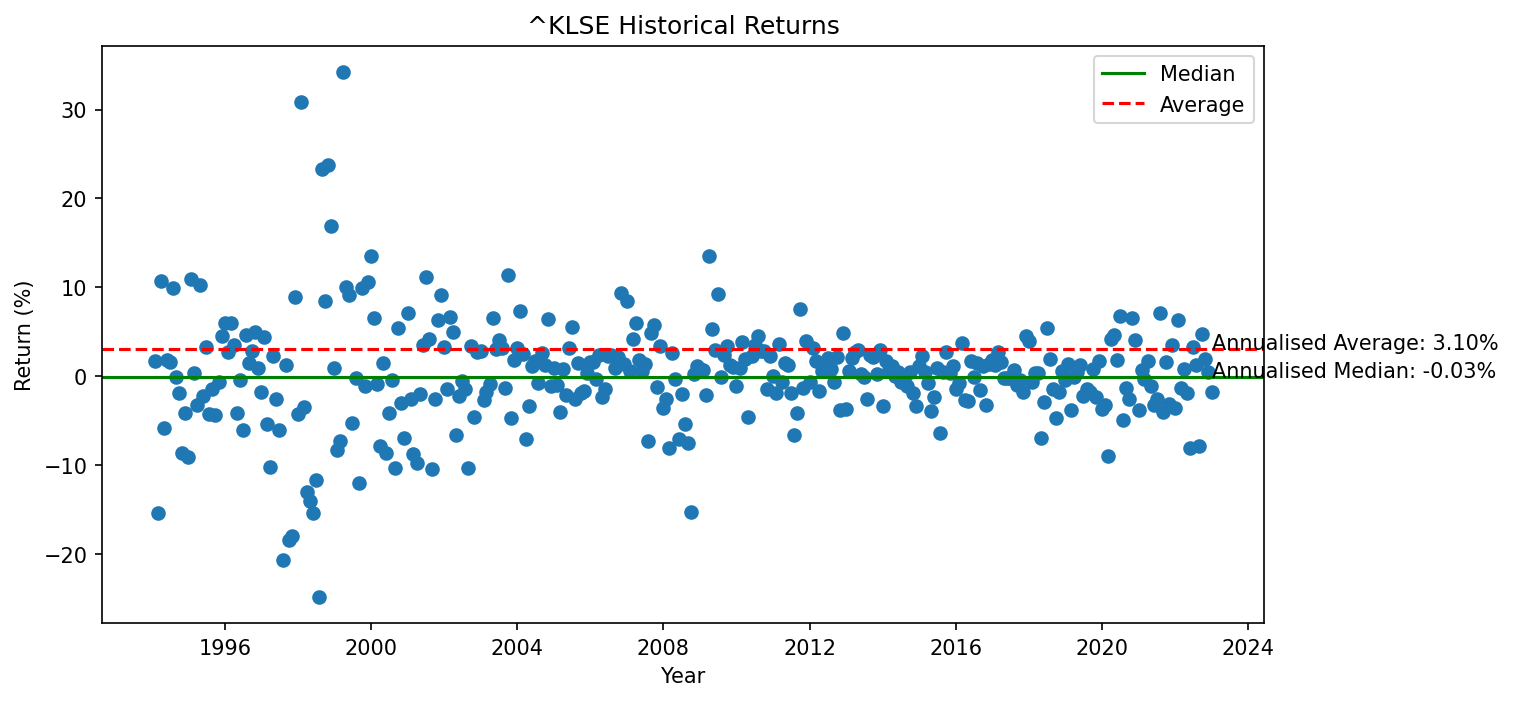

In [108]:
# Set the figure size (inches) and the resolution (dpi)
plt.figure(figsize=(10, 5), dpi=150)

# Add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Return (%)')
plt.title(f'{input} Historical Returns')

# Create a scatterplot of the returns data
plt.scatter(dates, returns)

# Draw a horizontal line 
plt.axhline(y=median_return, color='g', linestyle='-', label = 'Median')
plt.axhline(y=average_return, color='r', linestyle='--', label = 'Average')

# Add a text annotation to the plot showing the value of the average
plt.text(x=max(dates), y=median_return, s=f'Annualised Median: {median_return:.2f}%')
plt.text(x=max(dates), y=average_return, s=f'Annualised Average: {average_return:.2f}%')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [109]:
returns

Date
1994-01-01 00:00:00+08:00          NaN
1994-02-01 00:00:00+08:00     1.683847
1994-03-01 00:00:00+08:00   -15.361178
1994-04-01 00:00:00+08:00    10.683100
1994-05-01 00:00:00+08:00    -5.762923
                               ...    
2022-09-01 00:00:00+08:00    -7.765619
2022-10-01 00:00:00+08:00     4.714512
2022-11-01 00:00:00+08:00     1.946072
2022-12-01 00:00:00+08:00     0.449351
2023-01-01 00:00:00+08:00    -1.734545
Name: return, Length: 349, dtype: float64

In [110]:
dates

DatetimeIndex(['1994-01-01 00:00:00+08:00', '1994-02-01 00:00:00+08:00',
               '1994-03-01 00:00:00+08:00', '1994-04-01 00:00:00+08:00',
               '1994-05-01 00:00:00+08:00', '1994-06-01 00:00:00+08:00',
               '1994-07-01 00:00:00+08:00', '1994-08-01 00:00:00+08:00',
               '1994-09-01 00:00:00+08:00', '1994-10-01 00:00:00+08:00',
               ...
               '2022-04-01 00:00:00+08:00', '2022-05-01 00:00:00+08:00',
               '2022-06-01 00:00:00+08:00', '2022-07-01 00:00:00+08:00',
               '2022-08-01 00:00:00+08:00', '2022-09-01 00:00:00+08:00',
               '2022-10-01 00:00:00+08:00', '2022-11-01 00:00:00+08:00',
               '2022-12-01 00:00:00+08:00', '2023-01-01 00:00:00+08:00'],
              dtype='datetime64[ns, Asia/Kuala_Lumpur]', name='Date', length=349, freq=None)